In [58]:
import glob
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
palette = {'all_kfold': 'tab:blue', 'ts': 'tab:orange', 'all_nested': 'tab:green', 'fs_nested_pt_kfold': 'tab:red', 'fs_kfold_pt_nested': 'tab:purple'}

In [60]:
path = os.getcwd()
data_files = glob.glob(os.path.join(path, "binary/binary*"))

li = []
for filename in data_files:
    df = pd.read_csv(filename)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

new_names = dict([(i,'metric_'+ i) for i in df.iloc[0:1,9:].columns.values])
df.rename(columns=new_names, inplace=True)

df = df[df['metric_accuracy'].notna()]
df

,model,main_metric,sample_size,feature_selector,feature_selection_frac,validation_type,train_size,cv_split_size,par_split_size,metric_accuracy,metric_balanced_accuracy,metric_f1,metric_precision,metric_recall
0,logistic_regression,accuracy,0.03,rfe,0.4,ts,0.6,NaN,2,0.545455,0.550000,0.545455,0.554545,0.545455
1,logistic_regression,accuracy,0.03,rfe,0.4,ts,0.6,NaN,2,0.545455,0.550000,0.545455,0.554545,0.545455
2,logistic_regression,accuracy,0.03,rfe,0.4,ts,0.6,NaN,2,0.727273,0.716667,0.722611,0.730519,0.727273
3,logistic_regression,accuracy,0.03,rfe,0.4,ts,0.6,NaN,2,0.818182,0.833333,0.815152,0.870130,0.818182
4,logistic_regression,accuracy,0.03,rfe,0.4,ts,0.6,NaN,2,0.636364,0.633333,0.636364,0.636364,0.636364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837355,svm,recall,1.00,rfe,1.0,all_kfold,NaN,NaN,13,0.660935,0.651888,0.656214,0.662116,0.660935
837356,svm,recall,1.00,rfe,1.0,all_kfold,NaN,NaN,13,0.658629,0.648269,0.653809,0.658302,0.658629
837357,svm,recall,1.00,rfe,1.0,all_kfold,NaN,NaN,13,0.670717,0.659993,0.666249,0.670097,0.670717
837358,svm,recall,1.00,rfe,1.0,all_kfold,NaN,NaN,13,0.649992,0.639148,0.645330,0.660219,0.649992


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 837000 entries, 0 to 837359
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   model                     837000 non-null  object 
 1   main_metric               837000 non-null  object 
 2   sample_size               837000 non-null  float64
 3   feature_selector          837000 non-null  object 
 4   feature_selection_frac    837000 non-null  float64
 5   validation_type           837000 non-null  object 
 6   train_size                132000 non-null  float64
 7   cv_split_size             660000 non-null  float64
 8   par_split_size            837000 non-null  int64  
 9   metric_accuracy           837000 non-null  float64
 10  metric_balanced_accuracy  837000 non-null  float64
 11  metric_f1                 837000 non-null  float64
 12  metric_precision          837000 non-null  float64
 13  metric_recall             837000 non-null  f

In [62]:
selection = df[(df['feature_selection_frac'] == 1.0)
    & (df['main_metric'] == 'accuracy')
    & ((df['train_size'] == 0.8) | df['train_size'].isna())
    & ((df['cv_split_size'] == 13.0) | df['cv_split_size'].isna())]

In [63]:
selection = selection.reset_index()

In [64]:
pivoted = pd.wide_to_long(selection, stubnames='metric', i='index', j='metric_type', sep='_', suffix=r'\w+')
pivoted.reset_index(inplace=True)
pivoted = pivoted.drop('index', axis=1)
pivoted.rename(columns={'metric': 'metric_measurement'}, inplace=True)
pivoted

,metric_type,main_metric,feature_selector,feature_selection_frac,sample_size,cv_split_size,par_split_size,train_size,validation_type,model,metric_measurement
0,accuracy,accuracy,rfe,1.0,0.03,NaN,2,0.8,ts,logistic_regression,0.500000
1,accuracy,accuracy,rfe,1.0,0.03,NaN,2,0.8,ts,logistic_regression,0.666667
2,accuracy,accuracy,rfe,1.0,0.03,NaN,2,0.8,ts,logistic_regression,0.500000
3,accuracy,accuracy,rfe,1.0,0.03,NaN,2,0.8,ts,logistic_regression,0.833333
4,accuracy,accuracy,rfe,1.0,0.03,NaN,2,0.8,ts,logistic_regression,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
74495,recall,accuracy,rfe,1.0,1.00,NaN,13,NaN,all_kfold,svm,0.656617
74496,recall,accuracy,rfe,1.0,1.00,NaN,13,NaN,all_kfold,svm,0.658582
74497,recall,accuracy,rfe,1.0,1.00,NaN,13,NaN,all_kfold,svm,0.663195
74498,recall,accuracy,rfe,1.0,1.00,NaN,13,NaN,all_kfold,svm,0.644714


In [65]:
r = pivoted['sample_size'] * 918
pivoted['sample_size'] = r
pivoted

,metric_type,main_metric,feature_selector,feature_selection_frac,sample_size,cv_split_size,par_split_size,train_size,validation_type,model,metric_measurement
0,accuracy,accuracy,rfe,1.0,27.54,NaN,2,0.8,ts,logistic_regression,0.500000
1,accuracy,accuracy,rfe,1.0,27.54,NaN,2,0.8,ts,logistic_regression,0.666667
2,accuracy,accuracy,rfe,1.0,27.54,NaN,2,0.8,ts,logistic_regression,0.500000
3,accuracy,accuracy,rfe,1.0,27.54,NaN,2,0.8,ts,logistic_regression,0.833333
4,accuracy,accuracy,rfe,1.0,27.54,NaN,2,0.8,ts,logistic_regression,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
74495,recall,accuracy,rfe,1.0,918.00,NaN,13,NaN,all_kfold,svm,0.656617
74496,recall,accuracy,rfe,1.0,918.00,NaN,13,NaN,all_kfold,svm,0.658582
74497,recall,accuracy,rfe,1.0,918.00,NaN,13,NaN,all_kfold,svm,0.663195
74498,recall,accuracy,rfe,1.0,918.00,NaN,13,NaN,all_kfold,svm,0.644714


In [66]:
accuracy_selection = pivoted[pivoted['metric_type'] == 'accuracy']

In [67]:
accuracy_selection_lr = accuracy_selection[accuracy_selection['model'] == 'logistic_regression']
accuracy_selection_lr

,metric_type,main_metric,feature_selector,feature_selection_frac,sample_size,cv_split_size,par_split_size,train_size,validation_type,model,metric_measurement
0,accuracy,accuracy,rfe,1.0,27.54,NaN,2,0.8,ts,logistic_regression,0.500000
1,accuracy,accuracy,rfe,1.0,27.54,NaN,2,0.8,ts,logistic_regression,0.666667
2,accuracy,accuracy,rfe,1.0,27.54,NaN,2,0.8,ts,logistic_regression,0.500000
3,accuracy,accuracy,rfe,1.0,27.54,NaN,2,0.8,ts,logistic_regression,0.833333
4,accuracy,accuracy,rfe,1.0,27.54,NaN,2,0.8,ts,logistic_regression,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
7445,accuracy,accuracy,rfe,1.0,918.00,13.0,13,NaN,fs_kfold_pt_nested,logistic_regression,0.809828
7446,accuracy,accuracy,rfe,1.0,918.00,13.0,13,NaN,fs_kfold_pt_nested,logistic_regression,0.813140
7447,accuracy,accuracy,rfe,1.0,918.00,13.0,13,NaN,fs_kfold_pt_nested,logistic_regression,0.813063
7448,accuracy,accuracy,rfe,1.0,918.00,13.0,13,NaN,fs_kfold_pt_nested,logistic_regression,0.810989


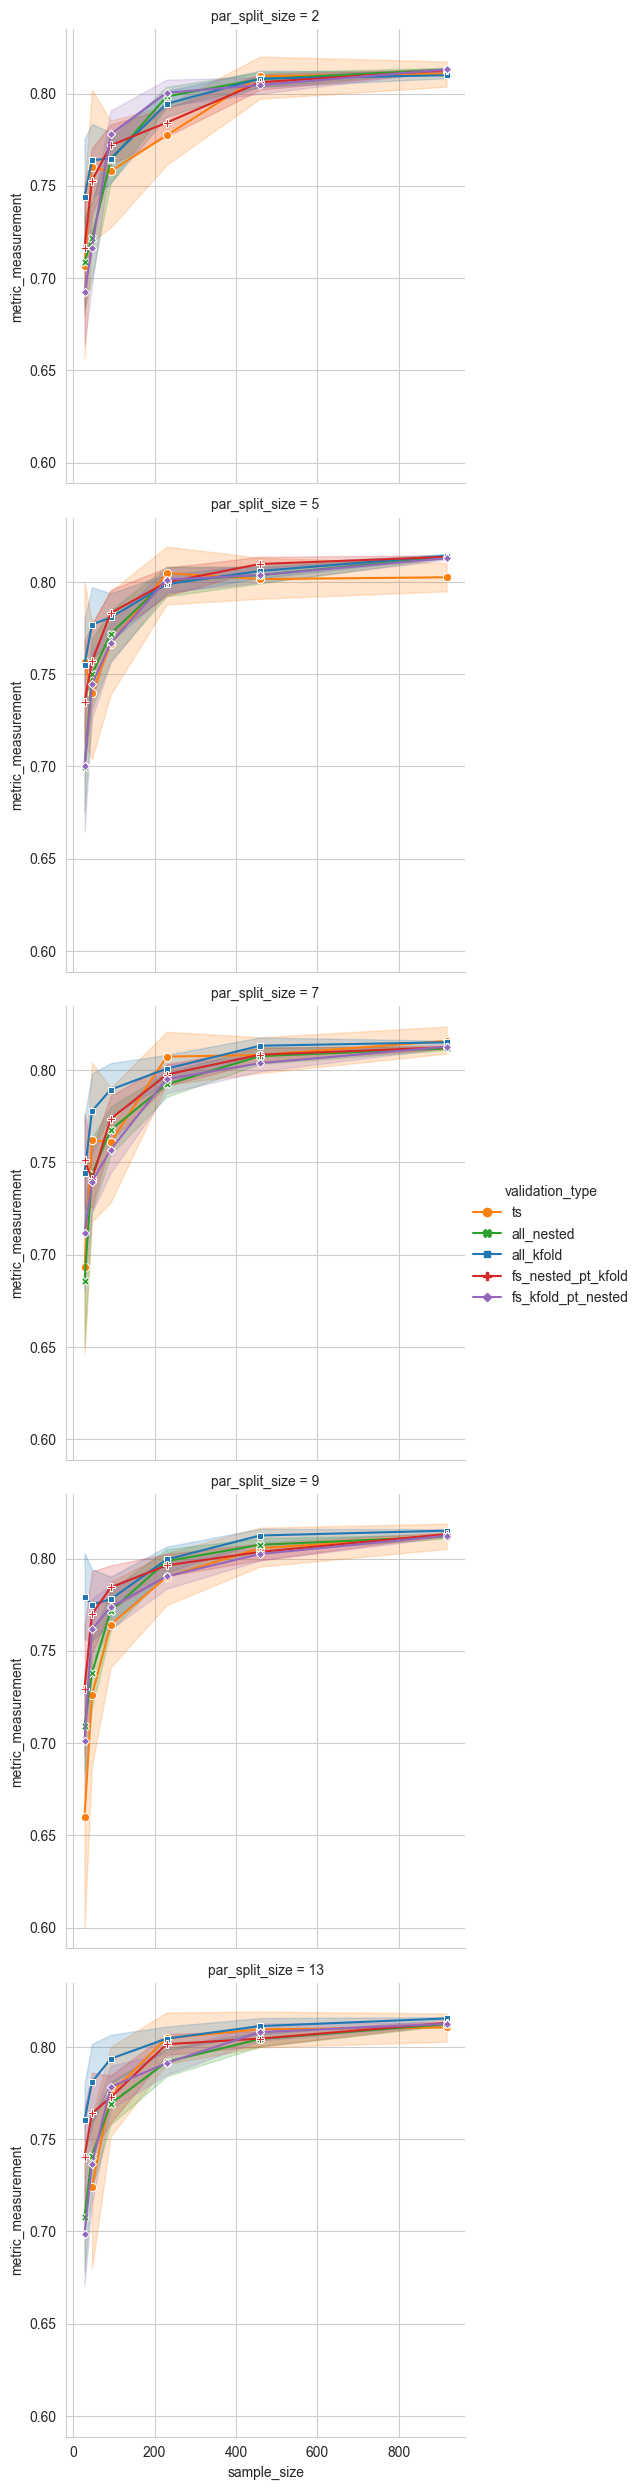

In [68]:
sns.relplot(x='sample_size', data=accuracy_selection_lr, hue='validation_type', kind='line', y='metric_measurement', ci=95, row='par_split_size', palette=palette, style='validation_type', markers=True, dashes=False)
plt.show()

In [69]:
selection_lr = pivoted[pivoted['model'] == 'logistic_regression']
selection_lr

,metric_type,main_metric,feature_selector,feature_selection_frac,sample_size,cv_split_size,par_split_size,train_size,validation_type,model,metric_measurement
0,accuracy,accuracy,rfe,1.0,27.54,NaN,2,0.8,ts,logistic_regression,0.500000
1,accuracy,accuracy,rfe,1.0,27.54,NaN,2,0.8,ts,logistic_regression,0.666667
2,accuracy,accuracy,rfe,1.0,27.54,NaN,2,0.8,ts,logistic_regression,0.500000
3,accuracy,accuracy,rfe,1.0,27.54,NaN,2,0.8,ts,logistic_regression,0.833333
4,accuracy,accuracy,rfe,1.0,27.54,NaN,2,0.8,ts,logistic_regression,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
67045,recall,accuracy,rfe,1.0,918.00,13.0,13,NaN,fs_kfold_pt_nested,logistic_regression,0.809828
67046,recall,accuracy,rfe,1.0,918.00,13.0,13,NaN,fs_kfold_pt_nested,logistic_regression,0.813140
67047,recall,accuracy,rfe,1.0,918.00,13.0,13,NaN,fs_kfold_pt_nested,logistic_regression,0.813063
67048,recall,accuracy,rfe,1.0,918.00,13.0,13,NaN,fs_kfold_pt_nested,logistic_regression,0.810989


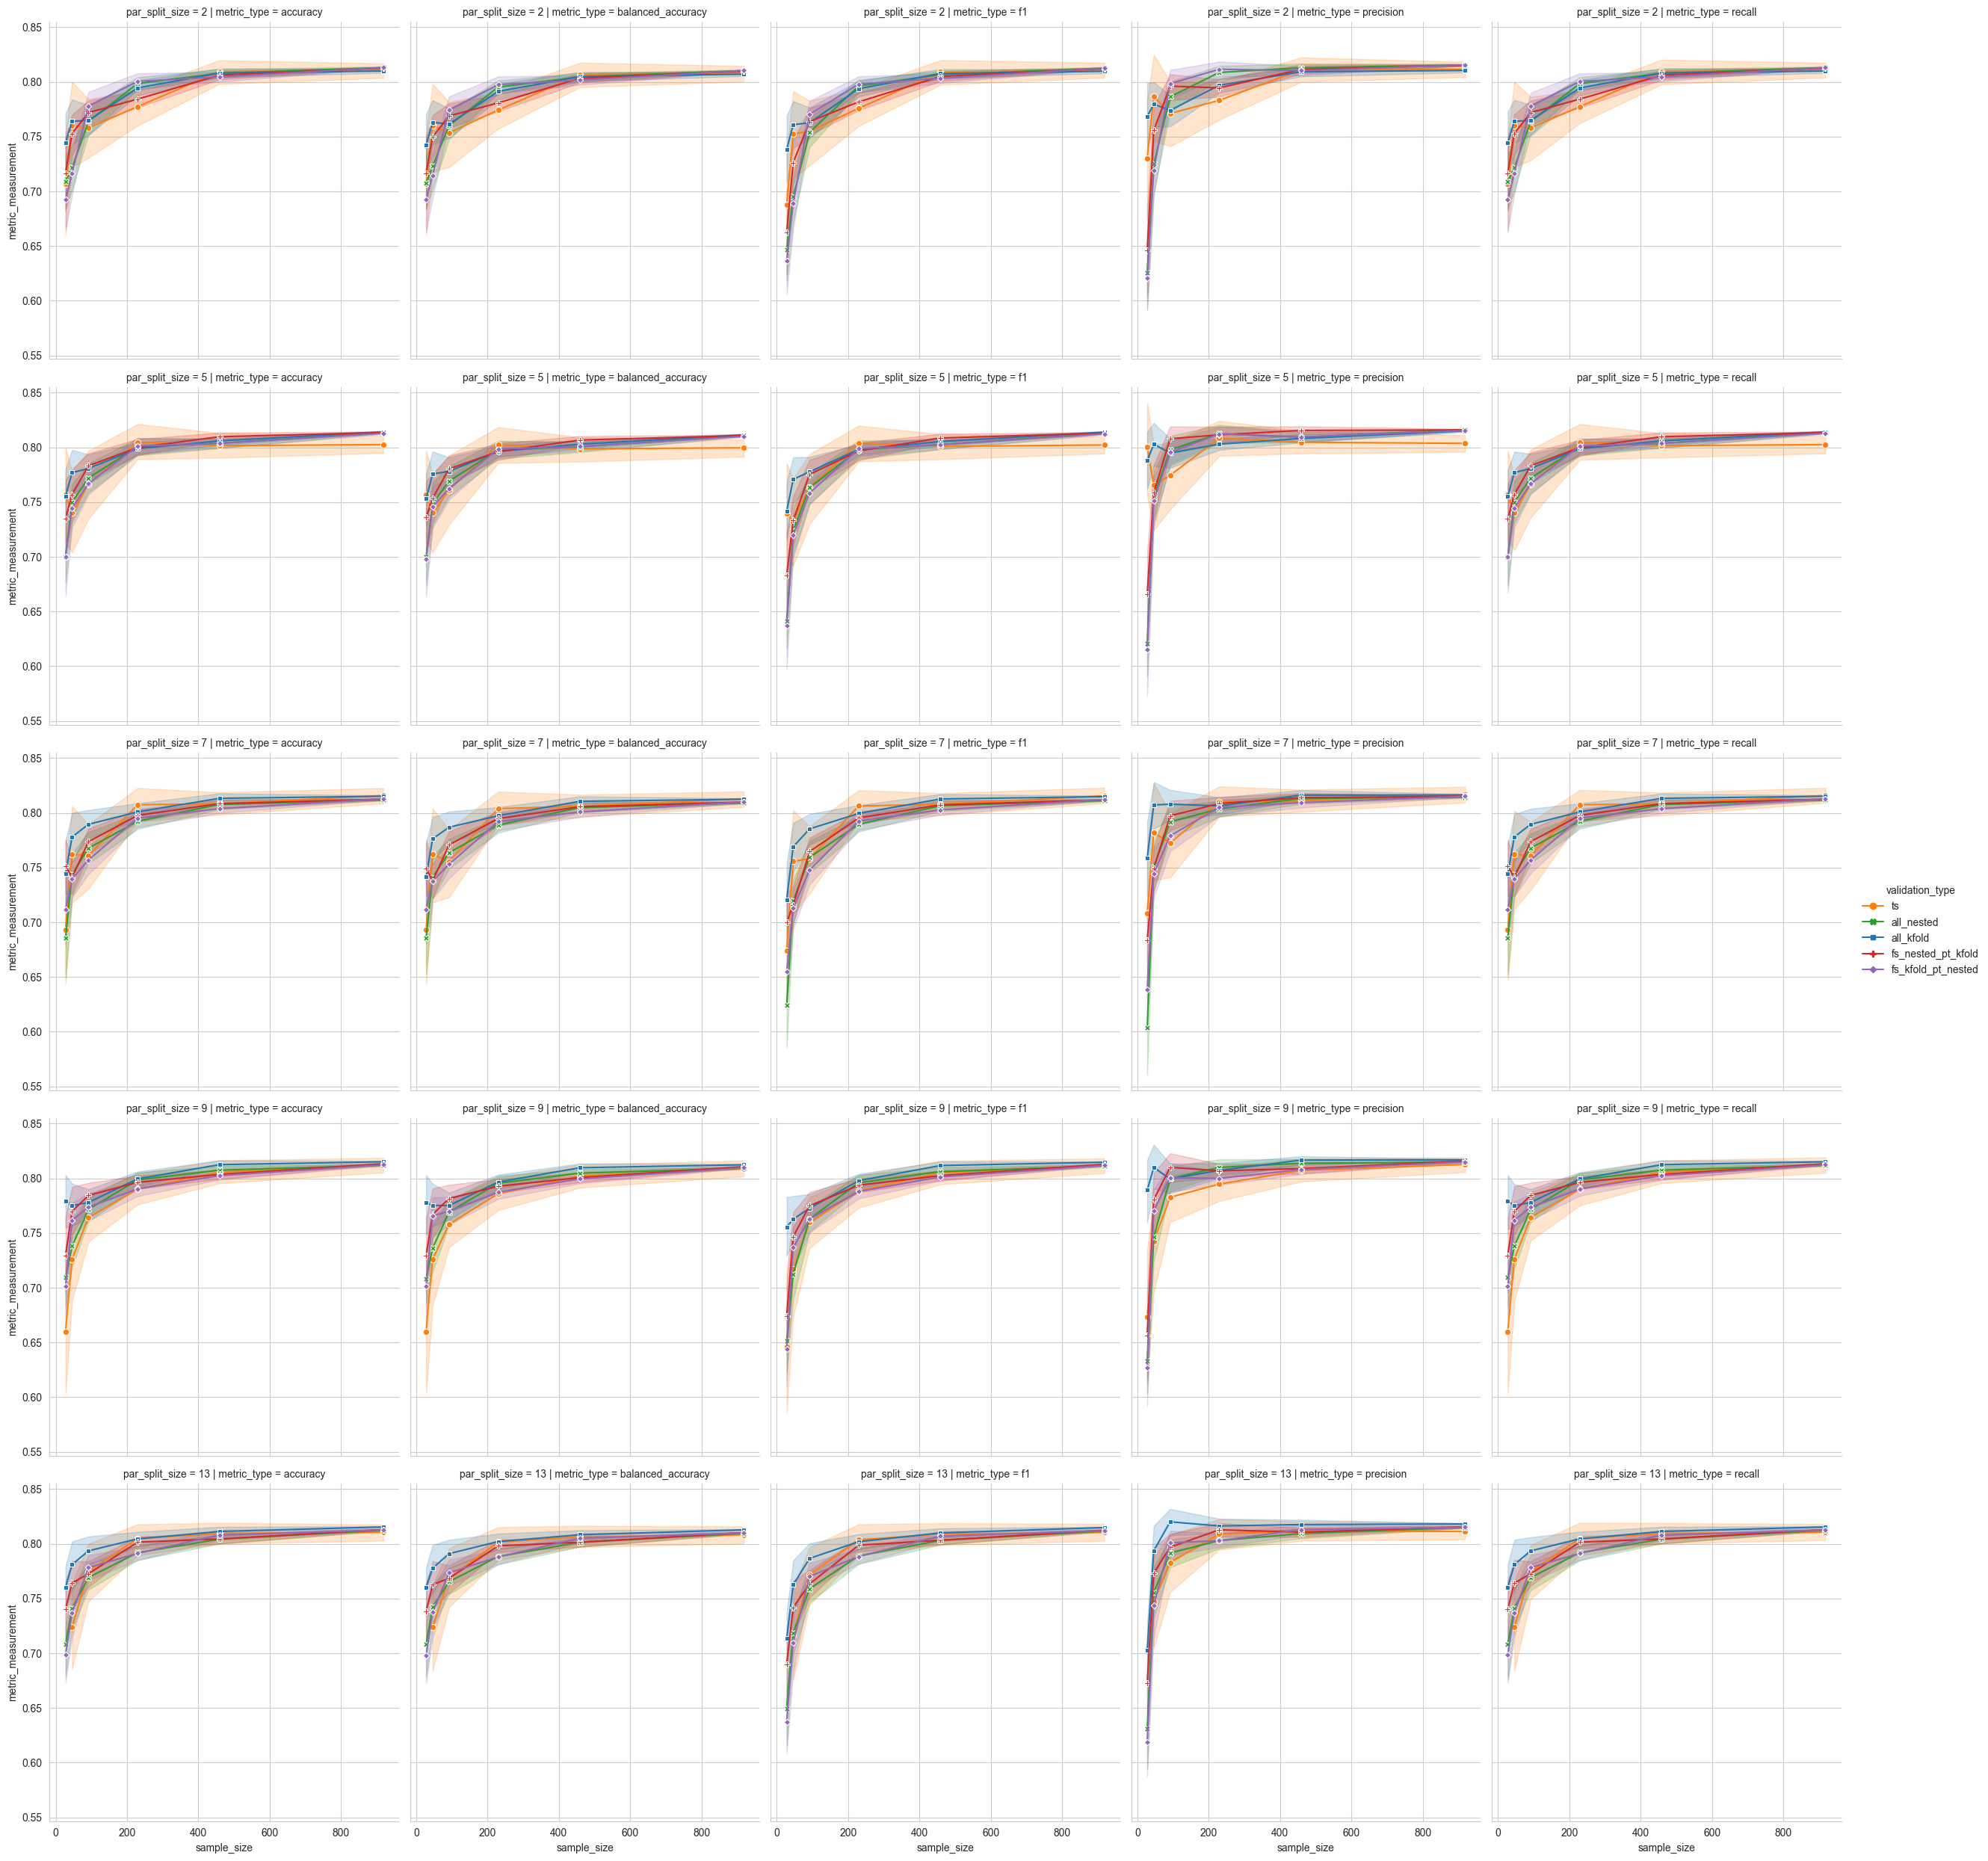

In [70]:
sns.relplot(x='sample_size', data=selection_lr, hue='validation_type', kind='line', y='metric_measurement',  ci=95, row='par_split_size', col='metric_type', palette=palette, style='validation_type', markers=True, dashes=False)
plt.show()

In [71]:
accuracy_selection_svm = accuracy_selection[accuracy_selection['model'] == 'svm']
accuracy_selection_svm

,metric_type,main_metric,feature_selector,feature_selection_frac,sample_size,cv_split_size,par_split_size,train_size,validation_type,model,metric_measurement
7450,accuracy,accuracy,rfe,1.0,27.54,13.0,2,NaN,fs_nested_pt_kfold,svm,0.512821
7451,accuracy,accuracy,rfe,1.0,27.54,13.0,2,NaN,fs_nested_pt_kfold,svm,0.525641
7452,accuracy,accuracy,rfe,1.0,27.54,13.0,2,NaN,fs_nested_pt_kfold,svm,0.589744
7453,accuracy,accuracy,rfe,1.0,27.54,13.0,2,NaN,fs_nested_pt_kfold,svm,0.551282
7454,accuracy,accuracy,rfe,1.0,27.54,13.0,2,NaN,fs_nested_pt_kfold,svm,0.512821
...,...,...,...,...,...,...,...,...,...,...,...
14895,accuracy,accuracy,rfe,1.0,918.00,NaN,13,NaN,all_kfold,svm,0.656617
14896,accuracy,accuracy,rfe,1.0,918.00,NaN,13,NaN,all_kfold,svm,0.658582
14897,accuracy,accuracy,rfe,1.0,918.00,NaN,13,NaN,all_kfold,svm,0.663195
14898,accuracy,accuracy,rfe,1.0,918.00,NaN,13,NaN,all_kfold,svm,0.644714


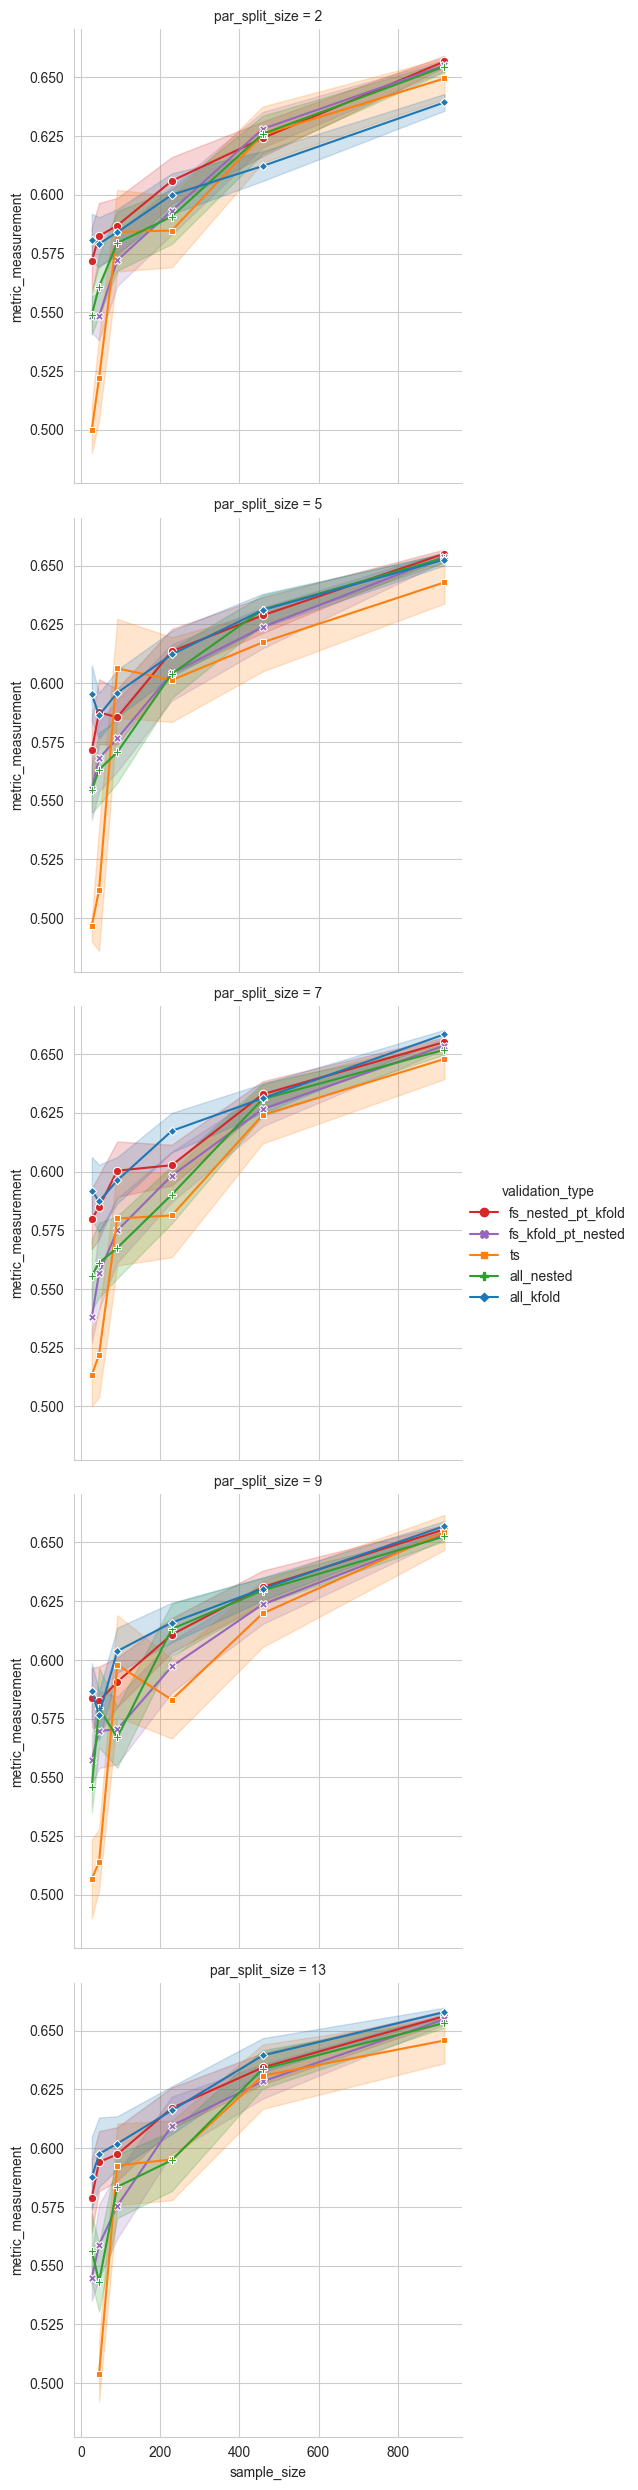

In [72]:
sns.relplot(x='sample_size', data=accuracy_selection_svm, hue='validation_type', kind='line', y='metric_measurement', ci=95, row='par_split_size', palette=palette, style='validation_type', markers=True, dashes=False)
plt.show()

In [73]:
selection_svm = pivoted[pivoted['model'] == 'svm']
selection_svm

,metric_type,main_metric,feature_selector,feature_selection_frac,sample_size,cv_split_size,par_split_size,train_size,validation_type,model,metric_measurement
7450,accuracy,accuracy,rfe,1.0,27.54,13.0,2,NaN,fs_nested_pt_kfold,svm,0.512821
7451,accuracy,accuracy,rfe,1.0,27.54,13.0,2,NaN,fs_nested_pt_kfold,svm,0.525641
7452,accuracy,accuracy,rfe,1.0,27.54,13.0,2,NaN,fs_nested_pt_kfold,svm,0.589744
7453,accuracy,accuracy,rfe,1.0,27.54,13.0,2,NaN,fs_nested_pt_kfold,svm,0.551282
7454,accuracy,accuracy,rfe,1.0,27.54,13.0,2,NaN,fs_nested_pt_kfold,svm,0.512821
...,...,...,...,...,...,...,...,...,...,...,...
74495,recall,accuracy,rfe,1.0,918.00,NaN,13,NaN,all_kfold,svm,0.656617
74496,recall,accuracy,rfe,1.0,918.00,NaN,13,NaN,all_kfold,svm,0.658582
74497,recall,accuracy,rfe,1.0,918.00,NaN,13,NaN,all_kfold,svm,0.663195
74498,recall,accuracy,rfe,1.0,918.00,NaN,13,NaN,all_kfold,svm,0.644714


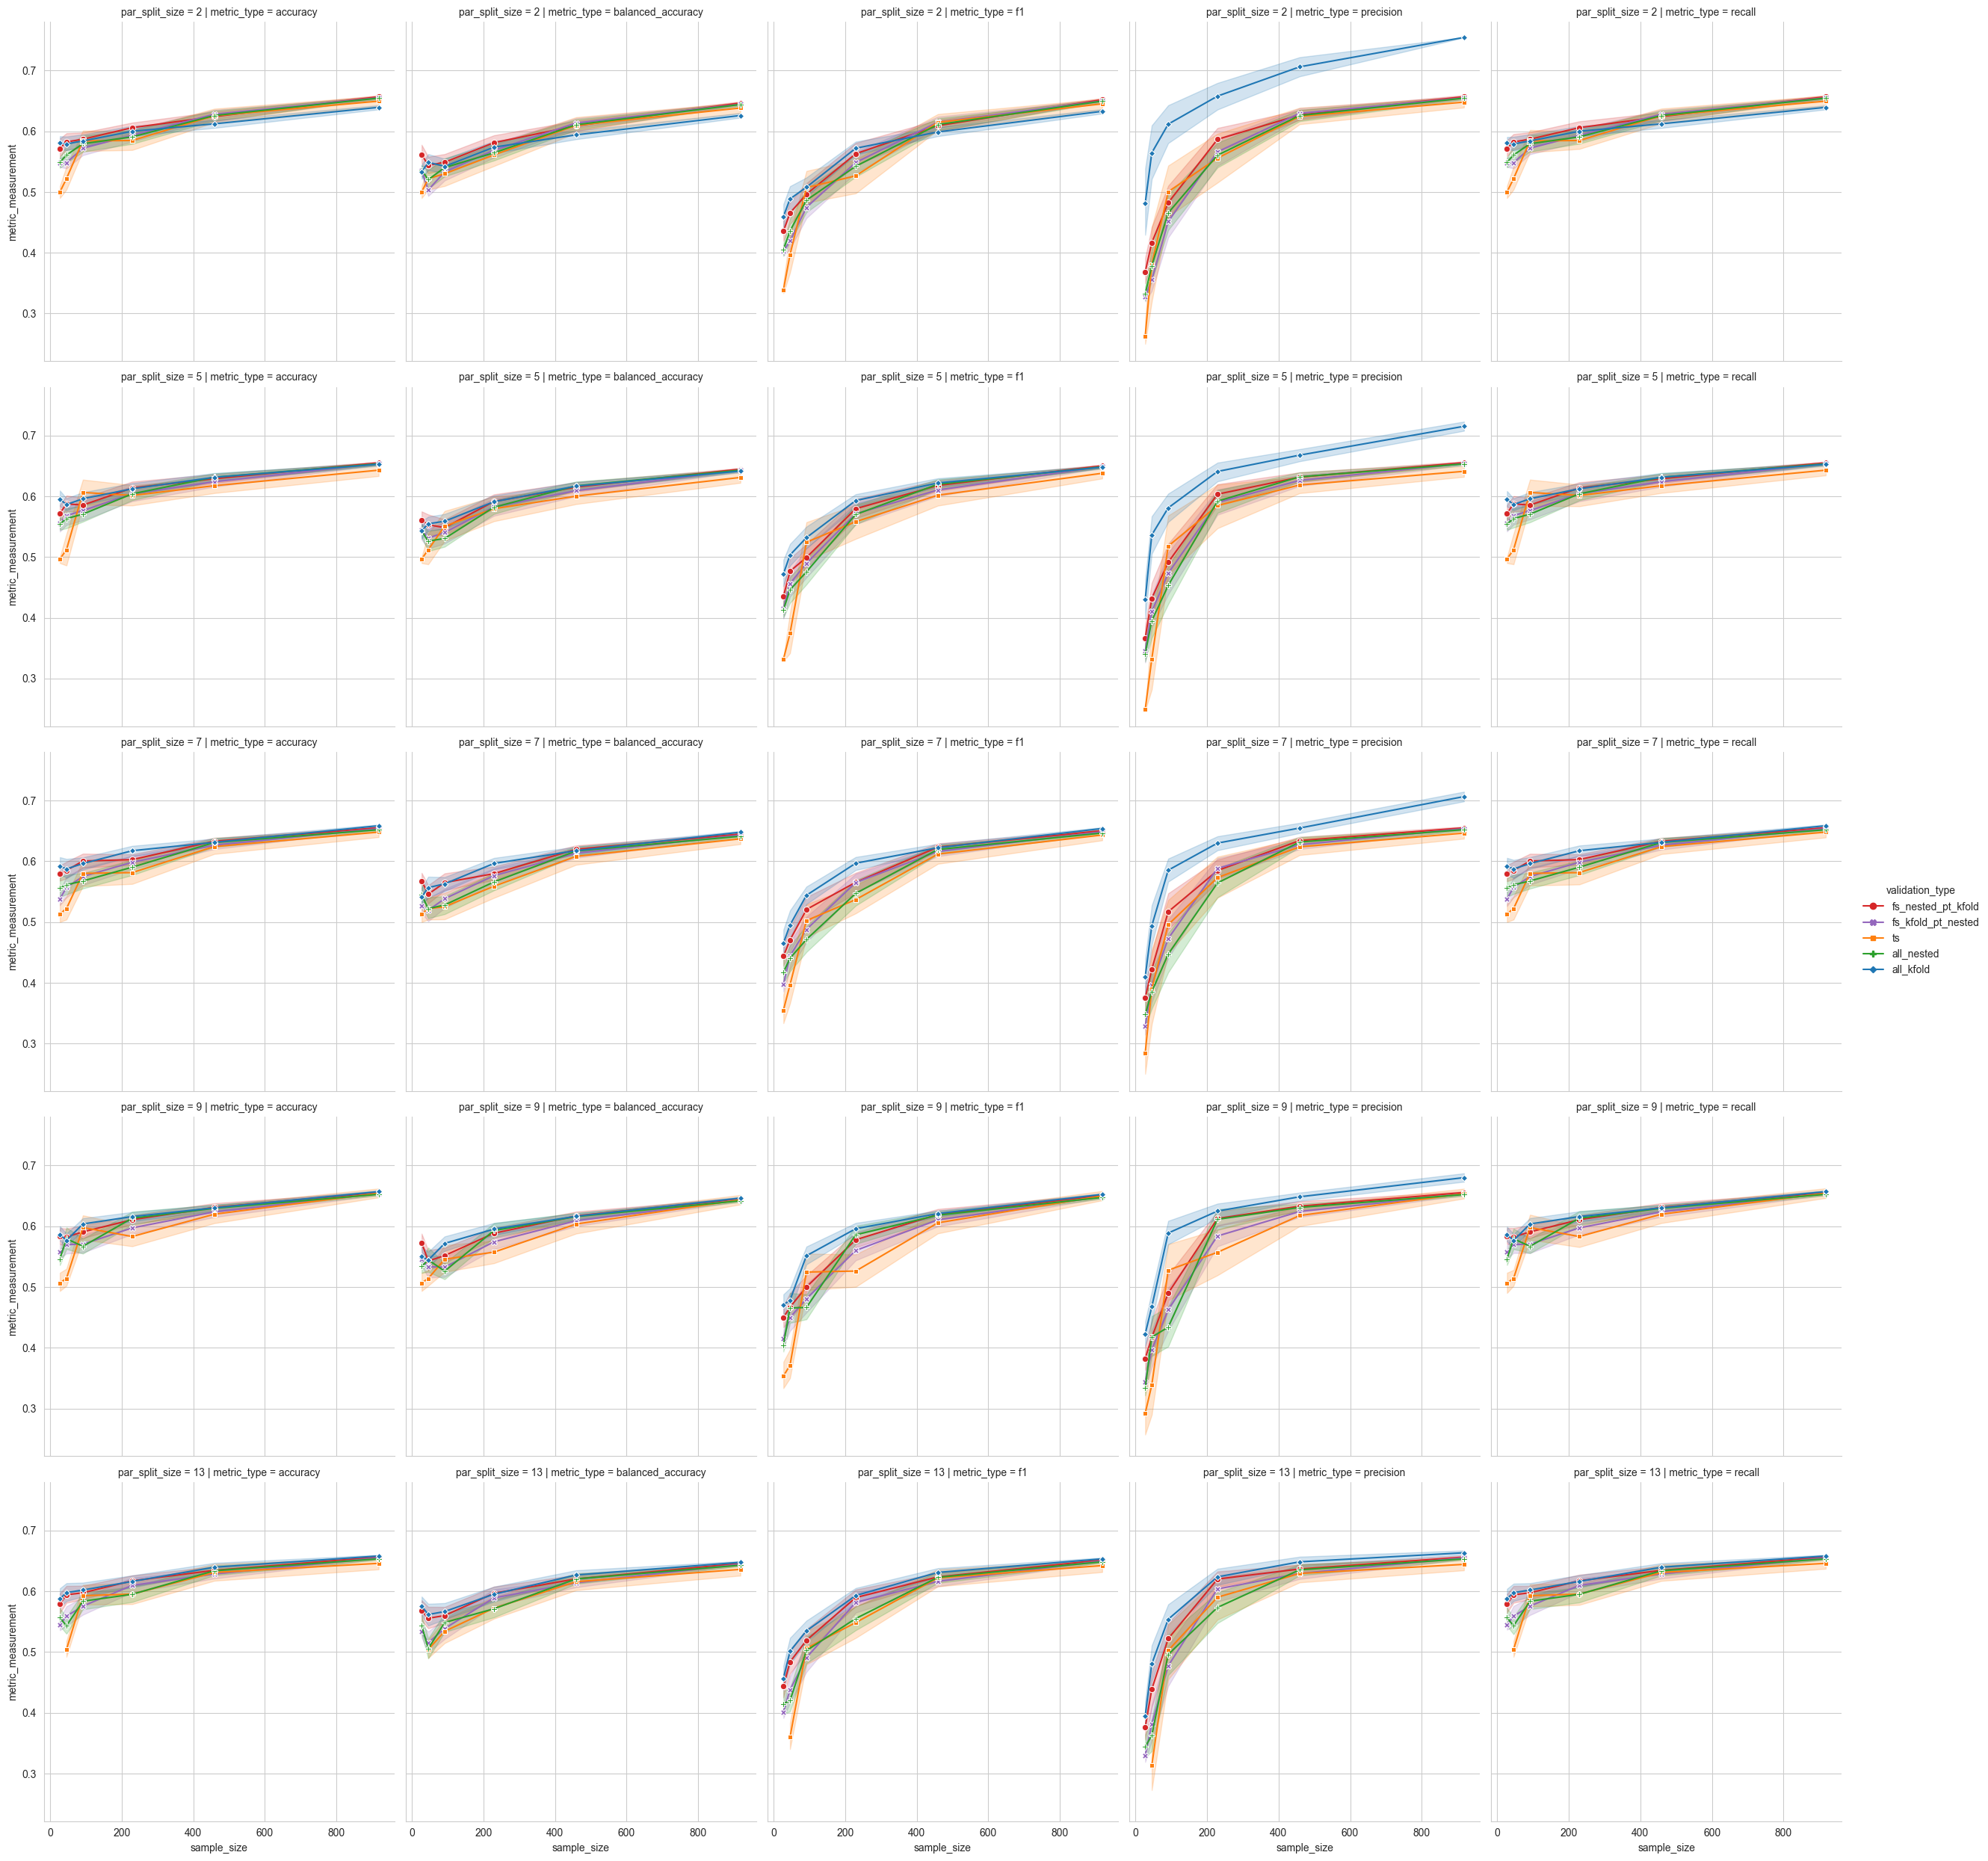

In [74]:
sns.relplot(x='sample_size', data=selection_svm, hue='validation_type', kind='line', y='metric_measurement',  ci=95, row='par_split_size', col='metric_type', palette=palette, style='validation_type', markers=True, dashes=False)
plt.show()